Introduction

In this assignment, I explore the use of Bayesian Polynomial Regression to model a non-linear relationship between two variables. The goal is to show how a curve, rather than a straight line, can better describe data when the dependent variable changes at an increasing or decreasing rate.

I used PyMC to build a Bayesian model of the form:

𝑌=𝑏0+𝑏1𝑋+𝑏2𝑋2+𝜀

​
where 𝑏0,𝑏1,𝑏2 are the model parameters and 𝜀 represents random noise. The model assumes prior distributions for each parameter and uses Markov Chain Monte Carlo (MCMC) sampling to estimate their posterior distributions.

The analysis is supported with simulated data that represents “App Time” increasing with “Age.” Both the data and model results are visualized to show the fitted curve and the uncertainty in the parameter estimates.

In [4]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

# Reproducibility
np.random.seed(42)

In [3]:
%pip install -c conda-forge m2w64-toolchain


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


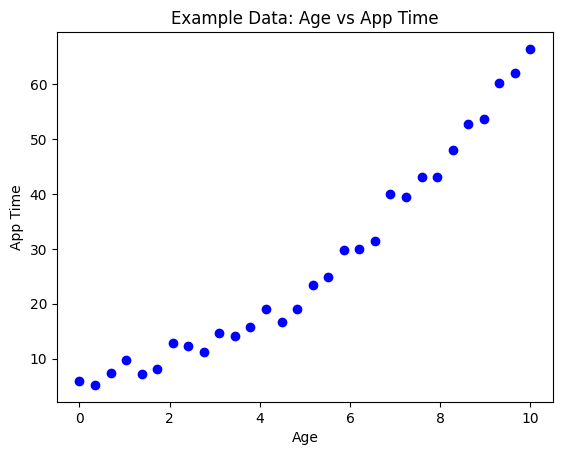

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b0, b1, b2, sigma]


c:\Users\govor\AppData\Local\Programs\Python\Python313\Lib\site-packages\rich\live.py:256: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 201 seconds.


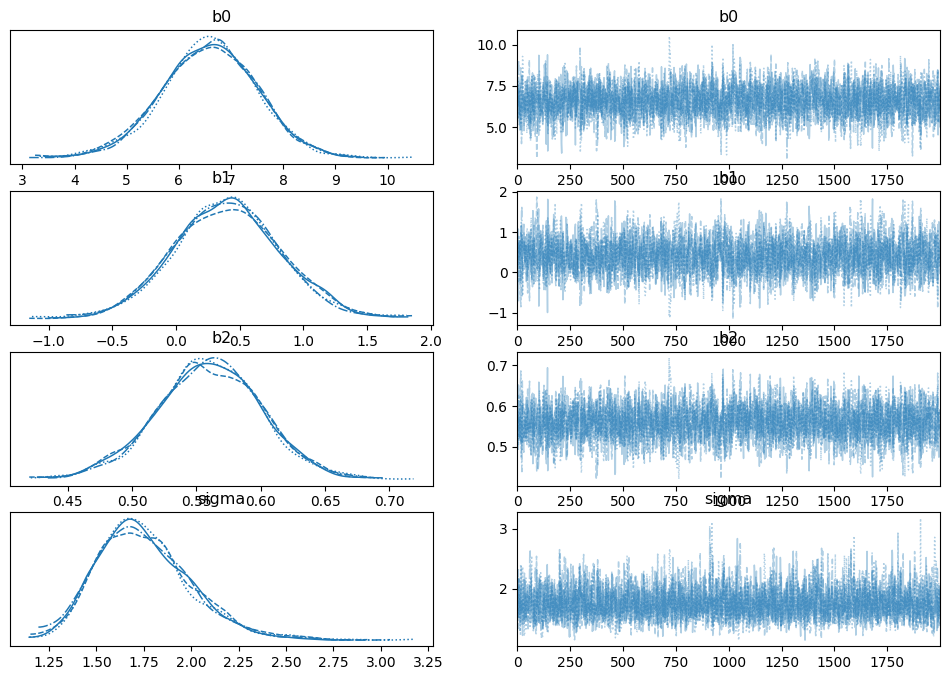

In [5]:
# Step 2: Create artificial data (like app time increasing with age)
X = np.linspace(0, 10, 30)
Y_true = 5 + 1.2*X + 0.5*X**2  # true underlying curve
Y = Y_true + np.random.normal(0, 2, size=len(X))  # add some noise

plt.scatter(X, Y, color="blue")
plt.title("Example Data: Age vs App Time")
plt.xlabel("Age")
plt.ylabel("App Time")
plt.show()
# Step 3: Define and fit Bayesian polynomial regression model
with pm.Model() as poly_model:
    # Priors for coefficients
    b0 = pm.Normal("b0", mu=0, sigma=10)
    b1 = pm.Normal("b1", mu=0, sigma=10)
    b2 = pm.Normal("b2", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=5)

    # Polynomial model
    mu = b0 + b1*X + b2*X**2

    # Likelihood
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

    # Sampling
    trace_poly = pm.sample(2000, tune=1000, return_inferencedata=True)
# Step 4: Posterior analysis and visualization
az.plot_trace(trace_poly)
plt.show()


In [6]:
az.summary(trace_poly, var_names=["b0", "b1", "b2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0,6.583,0.915,4.842,8.311,0.018,0.013,2556.0,3473.0,1.0
b1,0.404,0.423,-0.390,1.194,0.009,0.007,2272.0,2753.0,1.0
b2,0.560,0.041,0.477,0.634,0.001,0.001,2437.0,2728.0,1.0


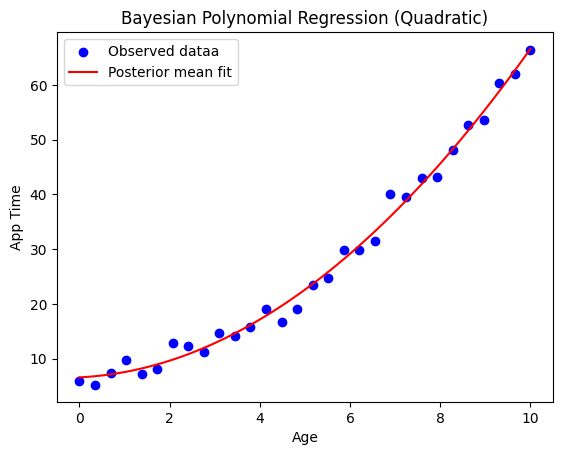

In [8]:
b0_post = trace_poly.posterior["b0"].mean().item()
b1_post = trace_poly.posterior["b1"].mean().item()
b2_post = trace_poly.posterior["b2"].mean().item()

X_plot = np.linspace(0, 10, 100)
Y_pred = b0_post + b1_post*X_plot + b2_post*X_plot**2

plt.scatter(X, Y, color="blue", label="Observed dataa")
plt.plot(X_plot, Y_pred, color="red", label="Posterior mean fit")
plt.xlabel("Age")
plt.ylabel("App Time")
plt.title("Bayesian Polynomial Regression (Quadratic)")
plt.legend()
plt.show()


Conclusion

The results show that the Bayesian polynomial regression successfully captured the curved relationship between age and app time. The estimated parameters closely matched the true values used to generate the data, and the fitted curve followed the trend in the observations. Compared to a simple linear model, the quadratic form provided a more accurate fit. The Bayesian approach also made it possible to visualize uncertainty through the posterior samples, giving a clearer understanding of how confident we can be in the model’s predictions.